In [1]:
!pip install netCDF4 --q

In [2]:
import netCDF4 as nc
from netCDF4 import Dataset
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
import numpy as np
import pandas
import matplotlib as plt

In [3]:
#Uploading Data and Variables
data = nc.Dataset('/content/test1hr.nc')

#print(data['temp'].shape)

rain_data = data["precip_liquid"]
rain_data = rain_data[:,[28],0,[10]]

wind_data = data['uvel']
wind_data = wind_data[:,[28],0,[10]]

temp_data = data['temp']
temp_data = temp_data[:,[28],0,[10]]

time = data['t']
time = np.asarray(time)

In [4]:
#Splitting Training/Testing Data
time_train,time_test,precip_train,precip_test  = train_test_split(time,rain_data,test_size=.2 )
time_train,time_test,uvel_train,uvel_test = train_test_split(time,wind_data,test_size=.2)
time_train,time_test,temp_train,temp_test = train_test_split(time,temp_data, test_size=.2)

training_data = [time_train, precip_train,uvel_train,temp_train]
testing_data = [time_test, precip_test,uvel_test,temp_test]
data = [time,rain_data, wind_data,temp_data]

In [5]:
#Normalizing Data
scaler = MinMaxScaler()
nsamples, nx, ny = precip_train.shape
rain_data_norm = precip_train.reshape((nsamples,nx*ny))
wind_data_norm = uvel_train.reshape((nsamples,nx*ny))
temp_data_norm = temp_train.reshape((nsamples,nx*ny))

precip_train = scaler.fit_transform(rain_data_norm)
uvel_train = scaler.fit_transform(wind_data_norm)
temp_train = scaler.fit_transform(temp_data_norm)

training = [precip_train,uvel_train,temp_train]
testing = [precip_test,uvel_test,temp_test]

In [6]:
#https://www.tensorflow.org/tutorials/generative/autoencoder
#TO DO: save best model
from tensorflow.keras.models import Model
latent_dim = 64

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential([
      keras.layers.Flatten(),
      keras.layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      keras.layers.Dense(784, activation='sigmoid'),
    ])

  def call(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)
autoencoder.compile(optimizer='adam', loss=keras.losses.MeanSquaredError()) #metrics=['accuracy'])

In [7]:
checkpoint = ModelCheckpoint(filepath='best_model.tf',save_best_only=True, monitor='val_loss',mode = 'min', verbose=1)

In [8]:
autoencoder.fit(time_train, training,
                epochs=100,
                verbose=0,
                shuffle=False,
                validation_data=(time_test, testing),
                callbacks=[checkpoint])
#TO DO: only print every 100 epochs


Epoch 1: val_loss improved from inf to 0.17389, saving model to best_model.tf



Epoch 2: val_loss improved from 0.17389 to 0.05350, saving model to best_model.tf



Epoch 3: val_loss improved from 0.05350 to 0.01544, saving model to best_model.tf



Epoch 4: val_loss improved from 0.01544 to 0.00415, saving model to best_model.tf



Epoch 5: val_loss improved from 0.00415 to 0.00285, saving model to best_model.tf



Epoch 6: val_loss improved from 0.00285 to 0.00282, saving model to best_model.tf



Epoch 7: val_loss improved from 0.00282 to 0.00280, saving model to best_model.tf



Epoch 8: val_loss improved from 0.00280 to 0.00278, saving model to best_model.tf



Epoch 9: val_loss improved from 0.00278 to 0.00276, saving model to best_model.tf



Epoch 10: val_loss improved from 0.00276 to 0.00275, saving model to best_model.tf



Epoch 11: val_loss improved from 0.00275 to 0.00273, saving model to best_model.tf



Epoch 12: val_loss improved from 0.00273 to 0.00271, saving model to best_model.tf



Epoch 13: val_loss improved from 0.00271 to 0.00269, saving model to best_model.tf



Epoch 14: val_loss improved from 0.00269 to 0.00267, saving model to best_model.tf



Epoch 15: val_loss improved from 0.00267 to 0.00265, saving model to best_model.tf



Epoch 16: val_loss improved from 0.00265 to 0.00263, saving model to best_model.tf



Epoch 17: val_loss improved from 0.00263 to 0.00261, saving model to best_model.tf



Epoch 18: val_loss improved from 0.00261 to 0.00259, saving model to best_model.tf



Epoch 19: val_loss improved from 0.00259 to 0.00257, saving model to best_model.tf



Epoch 20: val_loss improved from 0.00257 to 0.00255, saving model to best_model.tf



Epoch 21: val_loss improved from 0.00255 to 0.00253, saving model to best_model.tf



Epoch 22: val_loss improved from 0.00253 to 0.00251, saving model to best_model.tf



Epoch 23: val_loss improved from 0.00251 to 0.00249, saving model to best_model.tf



Epoch 24: val_loss improved from 0.00249 to 0.00247, saving model to best_model.tf



Epoch 25: val_loss improved from 0.00247 to 0.00245, saving model to best_model.tf



Epoch 26: val_loss improved from 0.00245 to 0.00243, saving model to best_model.tf



Epoch 27: val_loss improved from 0.00243 to 0.00241, saving model to best_model.tf



Epoch 28: val_loss improved from 0.00241 to 0.00239, saving model to best_model.tf



Epoch 29: val_loss improved from 0.00239 to 0.00237, saving model to best_model.tf



Epoch 30: val_loss improved from 0.00237 to 0.00236, saving model to best_model.tf



Epoch 31: val_loss improved from 0.00236 to 0.00234, saving model to best_model.tf



Epoch 32: val_loss improved from 0.00234 to 0.00232, saving model to best_model.tf



Epoch 33: val_loss improved from 0.00232 to 0.00230, saving model to best_model.tf



Epoch 34: val_loss improved from 0.00230 to 0.00228, saving model to best_model.tf



Epoch 35: val_loss improved from 0.00228 to 0.00226, saving model to best_model.tf



Epoch 36: val_loss improved from 0.00226 to 0.00224, saving model to best_model.tf



Epoch 37: val_loss improved from 0.00224 to 0.00222, saving model to best_model.tf



Epoch 38: val_loss improved from 0.00222 to 0.00221, saving model to best_model.tf



Epoch 39: val_loss improved from 0.00221 to 0.00219, saving model to best_model.tf



Epoch 40: val_loss improved from 0.00219 to 0.00217, saving model to best_model.tf



Epoch 41: val_loss improved from 0.00217 to 0.00215, saving model to best_model.tf



Epoch 42: val_loss improved from 0.00215 to 0.00214, saving model to best_model.tf



Epoch 43: val_loss improved from 0.00214 to 0.00212, saving model to best_model.tf



Epoch 44: val_loss improved from 0.00212 to 0.00210, saving model to best_model.tf



Epoch 45: val_loss improved from 0.00210 to 0.00208, saving model to best_model.tf



Epoch 46: val_loss improved from 0.00208 to 0.00207, saving model to best_model.tf



Epoch 47: val_loss improved from 0.00207 to 0.00205, saving model to best_model.tf



Epoch 48: val_loss improved from 0.00205 to 0.00203, saving model to best_model.tf



Epoch 49: val_loss improved from 0.00203 to 0.00202, saving model to best_model.tf



Epoch 50: val_loss improved from 0.00202 to 0.00200, saving model to best_model.tf



Epoch 51: val_loss improved from 0.00200 to 0.00199, saving model to best_model.tf



Epoch 52: val_loss improved from 0.00199 to 0.00197, saving model to best_model.tf



Epoch 53: val_loss improved from 0.00197 to 0.00195, saving model to best_model.tf



Epoch 54: val_loss improved from 0.00195 to 0.00194, saving model to best_model.tf



Epoch 55: val_loss improved from 0.00194 to 0.00192, saving model to best_model.tf



Epoch 56: val_loss improved from 0.00192 to 0.00191, saving model to best_model.tf



Epoch 57: val_loss improved from 0.00191 to 0.00189, saving model to best_model.tf



Epoch 58: val_loss improved from 0.00189 to 0.00188, saving model to best_model.tf



Epoch 59: val_loss improved from 0.00188 to 0.00186, saving model to best_model.tf



Epoch 60: val_loss improved from 0.00186 to 0.00185, saving model to best_model.tf



Epoch 61: val_loss improved from 0.00185 to 0.00183, saving model to best_model.tf



Epoch 62: val_loss improved from 0.00183 to 0.00182, saving model to best_model.tf



Epoch 63: val_loss improved from 0.00182 to 0.00181, saving model to best_model.tf



Epoch 64: val_loss improved from 0.00181 to 0.00179, saving model to best_model.tf



Epoch 65: val_loss improved from 0.00179 to 0.00178, saving model to best_model.tf



Epoch 66: val_loss improved from 0.00178 to 0.00176, saving model to best_model.tf



Epoch 67: val_loss improved from 0.00176 to 0.00175, saving model to best_model.tf



Epoch 68: val_loss improved from 0.00175 to 0.00174, saving model to best_model.tf



Epoch 69: val_loss improved from 0.00174 to 0.00172, saving model to best_model.tf



Epoch 70: val_loss improved from 0.00172 to 0.00171, saving model to best_model.tf



Epoch 71: val_loss improved from 0.00171 to 0.00170, saving model to best_model.tf



Epoch 72: val_loss improved from 0.00170 to 0.00168, saving model to best_model.tf



Epoch 73: val_loss improved from 0.00168 to 0.00167, saving model to best_model.tf



Epoch 74: val_loss improved from 0.00167 to 0.00166, saving model to best_model.tf



Epoch 75: val_loss improved from 0.00166 to 0.00165, saving model to best_model.tf



Epoch 76: val_loss improved from 0.00165 to 0.00163, saving model to best_model.tf



Epoch 77: val_loss improved from 0.00163 to 0.00162, saving model to best_model.tf



Epoch 78: val_loss improved from 0.00162 to 0.00161, saving model to best_model.tf



Epoch 79: val_loss improved from 0.00161 to 0.00160, saving model to best_model.tf



Epoch 80: val_loss improved from 0.00160 to 0.00158, saving model to best_model.tf



Epoch 81: val_loss improved from 0.00158 to 0.00157, saving model to best_model.tf



Epoch 82: val_loss improved from 0.00157 to 0.00156, saving model to best_model.tf



Epoch 83: val_loss improved from 0.00156 to 0.00155, saving model to best_model.tf



Epoch 84: val_loss improved from 0.00155 to 0.00154, saving model to best_model.tf



Epoch 85: val_loss improved from 0.00154 to 0.00153, saving model to best_model.tf



Epoch 86: val_loss improved from 0.00153 to 0.00152, saving model to best_model.tf



Epoch 87: val_loss improved from 0.00152 to 0.00150, saving model to best_model.tf



Epoch 88: val_loss improved from 0.00150 to 0.00149, saving model to best_model.tf



Epoch 89: val_loss improved from 0.00149 to 0.00148, saving model to best_model.tf



Epoch 90: val_loss improved from 0.00148 to 0.00147, saving model to best_model.tf



Epoch 91: val_loss improved from 0.00147 to 0.00146, saving model to best_model.tf



Epoch 92: val_loss improved from 0.00146 to 0.00145, saving model to best_model.tf



Epoch 93: val_loss improved from 0.00145 to 0.00144, saving model to best_model.tf



Epoch 94: val_loss improved from 0.00144 to 0.00143, saving model to best_model.tf



Epoch 95: val_loss improved from 0.00143 to 0.00142, saving model to best_model.tf



Epoch 96: val_loss improved from 0.00142 to 0.00141, saving model to best_model.tf



Epoch 97: val_loss improved from 0.00141 to 0.00140, saving model to best_model.tf



Epoch 98: val_loss improved from 0.00140 to 0.00139, saving model to best_model.tf



Epoch 99: val_loss improved from 0.00139 to 0.00138, saving model to best_model.tf



Epoch 100: val_loss improved from 0.00138 to 0.00137, saving model to best_model.tf


Text(0, 0.5, 'precipitation (precip_liquid)')

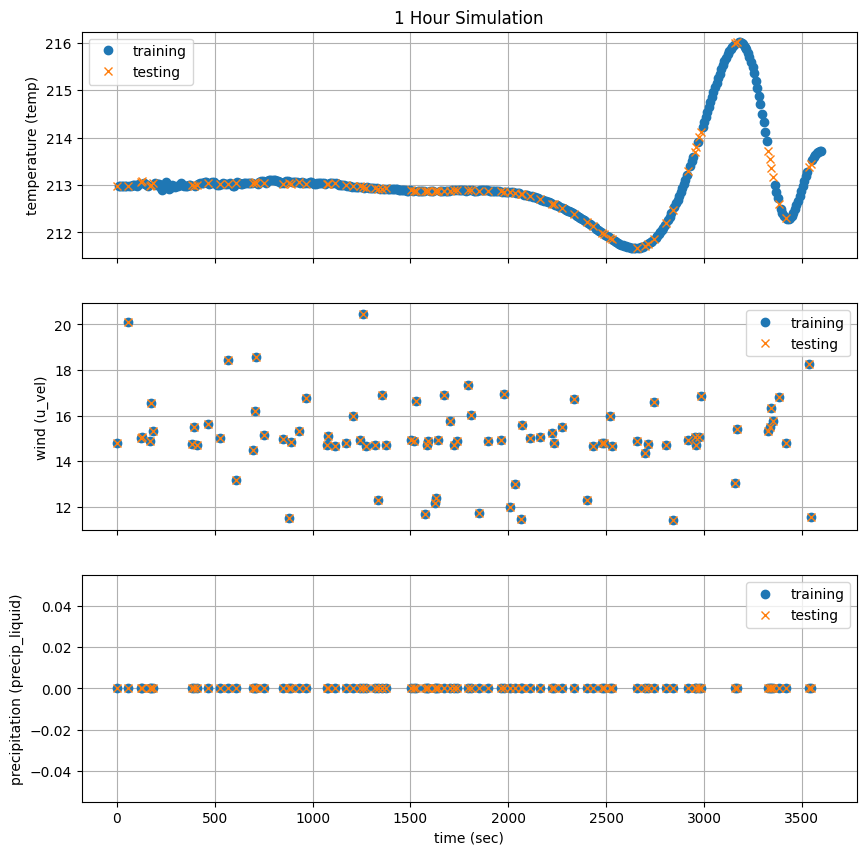

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,sharex=True, sharey=False,figsize= (10,10))

training_data[1] = training_data[1].reshape(-1,)
training_data[2] = training_data[2].reshape(-1,)
training_data[3] = training_data[3].reshape(-1,)

testing_data[1] = testing_data[1].reshape(-1,)
testing_data[2] = testing_data[2].reshape(-1,)
testing_data[3] = testing_data[3].reshape(-1,)

ax[0].plot(time_train, training_data[3],'o',time_test, testing_data[3],'x')
ax[0].grid()
ax[0].set_title('1 Hour Simulation')
ax[0].legend(['training','testing'])
ax[0].set_ylabel('temperature (temp)')

ax[1].plot(time_test, testing_data[2],'o',time_test, testing_data[2],'x')
ax[1].grid()
ax[1].legend(['training','testing'])
ax[1].set_ylabel('wind (u_vel)')

ax[2].plot(time_test, testing_data[1],'o',time_test, testing_data[1],'x')
ax[2].grid()
ax[2].legend(['training','testing'])
ax[2].set_xlabel('time (sec)')
ax[2].set_ylabel('precipitation (precip_liquid)')